<a href="https://colab.research.google.com/github/Chuck2Win/Linear_regression-from-Scratch-/blob/master/Logistic_regression_2(from_scratch)(lecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. plott the training data

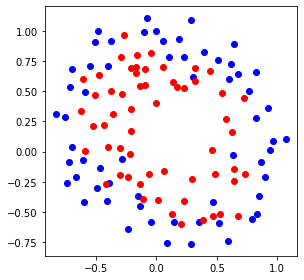

In [4]:
data=np.genfromtxt('https://raw.githubusercontent.com/Chuck2Win/Linear_regression-from-Scratch-/master/data/data-nonlinear%20(2).txt',delimiter=',')
pointX = data[:, 0]
pointY = data[:, 1]
label = data[:, 2]
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [5]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def hypothesis(theta,input):
    return sigmoid(np.dot(input,theta))
    
def objective_function(theta,input,label):
    return (-label*np.log(hypothesis(theta,input))-(1-label)*np.log(1-hypothesis(theta,input))).mean()
    
def gradient_descent(theta,input,label,learning_rate):
    theta=theta-learning_rate*((hypothesis(theta,input)-label).reshape(-1,1)*input).sum(axis=0)
    return theta

# 2. Write down the high dimensional function 


In [6]:
def hypothesis(theta,input):
    return sigmoid(np.dot(input,theta))

# 3. Plot the training error

In [7]:
x_train=np.ones((data.shape[0],data.shape[1]))
x_train[:,1:]=data[:,:-1]
y_train=data[:,-1]

In [8]:
# 초기값 다 0으로
# learning rate 0.00001
# epoch 만큼
cost=[]
ACC=[]
epochs=50000
theta=np.array([0,0,0]) # theta0,theta1,theta2
Theta=[list(theta)] # theta는 np.array인데 list로 바꿔서 append
learning_rate=0.00001
for epoch in range(epochs):
    cost.append(objective_function(theta,x_train,y_train))
    theta=gradient_descent(theta,x_train,y_train,learning_rate)
    Theta.append(list(theta)) 
    acc=((hypothesis(theta,x_train)>0.5)==y_train).mean() # 정확도
    ACC.append(acc)
Theta=np.array(Theta)   

In [14]:
(hypothesis(theta,x_train)>0.5)==y_train

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

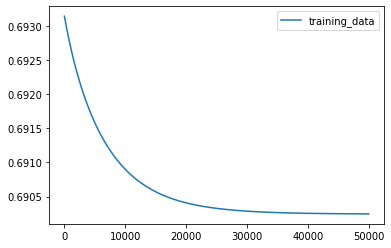

In [9]:
plt.plot(cost,label='training_data')
plt.legend(loc=0)
plt.show()

#4. Plot the training accuracy

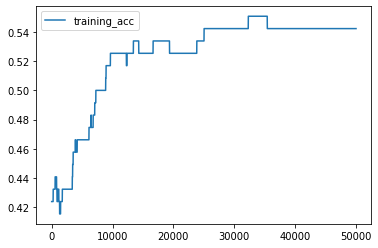

In [10]:
plt.plot(ACC,label='training_acc')
plt.legend(loc=0)
plt.show()

# 5. Write down the final training accuracy

In [11]:
print(ACC[-1])

0.5423728813559322


# 6. Plot the optimal classifier superimposed on the training data.


In [25]:
Z.shape

(77, 79)

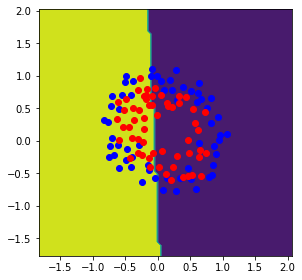

In [12]:
xx, yy = np.meshgrid(np.arange(pointX.min()-1, pointX.max()+1, 0.05), np.arange(pointY.min()-1, pointX.max()+1,0.05))
X = np.vstack( ( xx.reshape(1, np.product(xx.shape)), yy.reshape(1, np.product(yy.shape)) ) ).T # T는 전치
temp = np.ones((X.shape[0],X.shape[1]+1))
temp[:,1:] = X
# Predict the function value for the whole grid
pred = (hypothesis(theta,temp)>0.5)
Z = pred.reshape(xx.shape)
# Plot the contour and training examples <- 앞 선 문제라고 생각하면 됨.

plt.figure()
plt.contourf(xx, yy, Z)
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()